In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Figure and axes

* [Usage Guide](https://matplotlib.org/3.3.3/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)

## Figure
* [matplotlib.pyplot.figure](https://matplotlib.org/3.3.4/api/_as_gen/matplotlib.pyplot.figure.html)

The root container that contains one or more ```axes```, a vector (2D or 3D) space in which figure elements can exist. Relation between Figure to an Axes space is one to many. A ```Figure``` can contain many ```Axes```, but a given ```Axes``` object can only be in one ```Figure```. 

See the documentation for the attributes of a ```figure``` and interfaces.




<img src="image/matplotlib_anatomy_of_a_figure.png" align="left"/>

## Axes

**An** ```axes``` is a container space that:

1. Sets the coordinate system e.g. x-y coordinates, theta-r in a polar plot, or x-y-z in a 3D plot, etc.
2. Contains figure elements (e.g. Axis, Tick, Line2D, Text, Polygon), the location of which are specified in the coordinates.

NOT the lines of x-axis and y-axis as they are elements of an ```Axes``` instance that you access via get_xaxis() and get_yaxis() API.




### Creating a figure and access its ```Axes```

Beware that ```Axes``` is an object that provides a space, hence there can be multiple ```Axes```es.

```
fig = plt.figure()             # an empty figure with no Axes
fig, ax = plt.subplots()       # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
```

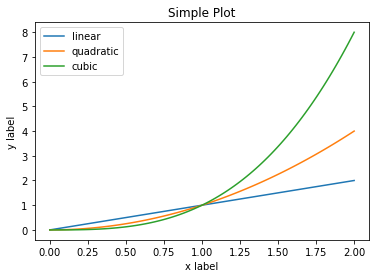

In [2]:
x = np.linspace(0, 2, 100)

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

## Axis

* [matplotlib.axis](https://matplotlib.org/stable/api/axis_api.html)

An ```Axes``` contains two (2D) or three (3D) ```Axis``` objects, each of which defines a basis dimension of the space. As the "Axes" space is finite, it has:

1. Upper/lower limits of the axis
2. Ticks and ticklabels    



The location of the ticks is determined by a Locator object and the ticklabel strings are formatted by a Formatter. The combination of the correct Locator and Formatter gives very fine control over the tick locations and labels.



## Spine

Four spines (top, bottom, left, right) frame a plane of an "Axes" space. (top, bottom) refers to ```Axes.xasis``` and (left, right) refer to ```Axes.yaxis```.

* [_AxesBase.def _init_axis(self):](https://github.com/matplotlib/matplotlib/blob/master/lib/matplotlib/axes/_base.py#L742-L750)


```
class _AxesBase(martist.Artist):
    def __init__(self, fig, rect,
                 facecolor=None,  # defaults to rc axes.facecolor
                 frameon=True,
                 sharex=None,  # use Axes instance's xaxis info
                 sharey=None,  # use Axes instance's yaxis info
                 label='',
                 xscale=None,
                 yscale=None,
                 box_aspect=None,
                 **kwargs
                 ):
                 
        # --------------------------------------------------------------------------------
        # Create the "framing beams" (top, bottom, left, right) of the 2D container "Axes" 
        # --------------------------------------------------------------------------------
        self.spines = mspines.Spines.from_dict(self._gen_axes_spines())

        # --------------------------------------------------------------------------------
        # Create the "spines" (top, bottom, left, right) that frame the 2D "Axes" space. 
        # --------------------------------------------------------------------------------
        self._init_axis()        

    def _init_axis(self):
        # --------------------------------------------------------------------------------
        # (top, bottom) "spines" refer to 'xaxis' of the 2D container "Axes".
        # --------------------------------------------------------------------------------
        self.xaxis = maxis.XAxis(self)
        self.spines.bottom.register_axis(self.xaxis)
        self.spines.top.register_axis(self.xaxis)

        # --------------------------------------------------------------------------------
        # (top, bottom) "spines" refer to 'yaxis' of the 2D container "Axes".
        # --------------------------------------------------------------------------------
        self.yaxis = maxis.YAxis(self)
        self.spines.left.register_axis(self.yaxis)
        self.spines.right.register_axis(self.yaxis)
        self._update_transScale()

    def _gen_axes_spines(self, locations=None, offset=0.0, units='inches'):
        """
        return OrderedDict(
            (side, mspines.Spine.linear_spine(self, side))
            for side in ['left', 'right', 'bottom', 'top']
        )
```        

A spine can be re-positioned 

[](https://github.com/matplotlib/matplotlib/blob/master/lib/matplotlib/spines.py#L294)
```
    def set_position(self, position):
        """
        Spine position is specified by a 2 tuple of (position type, amount). 
        The position types are:
        * 'outward': place the spine out from the data area by the specified
          number of points. (Negative values place the spine inwards.)
        * 'axes': place the spine at the specified Axes coordinate (0 to 1).
        * 'data': place the spine at the specified data coordinate.
        Additionally, shorthand notations define a special positions:
        * 'center' -> ('axes', 0.5)
        * 'zero' -> ('data', 0.0)
        """
        if position in ('center', 'zero'):  # special positions
            pass
        else:
            if len(position) != 2:
                raise ValueError("position should be 'center' or 2-tuple")
            if position[0] not in ['outward', 'axes', 'data']:
                raise ValueError("position[0] should be one of 'outward', "
                                 "'axes', or 'data' ")
        self._position = position
        self.set_transform(self.get_spine_transform())
        if self.axis is not None:
            self.axis.reset_ticks()
        self.stale = True
```


### Displaying a spine as an **axis line**

A spine an be re-positioned with its [Spine.set_position()](https://matplotlib.org/stable/api/spines_api.html#matplotlib.spines.Spine.set_position) API and it will be displayed as a "**axis line**" of the plot area (Not an Axis class instance).

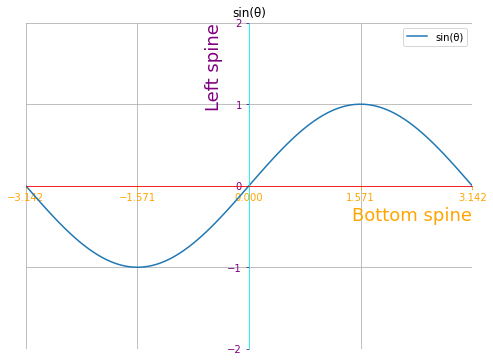

In [40]:
# --------------------------------------------------------------------------------
# Plot space (axes)
# --------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(8,6)) 

# --------------------------------------------------------------------------------
# Xaxis/spine. Use only "bottom" to have one axis line
# --------------------------------------------------------------------------------
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.spines['bottom'].set_color('red')

# Axes I/F can be used as well for spine I/F
ax.set_xlabel("Bottom spine", loc='right', fontsize=18, color='orange')
ax.tick_params(axis='x', colors='orange')   # Set axis line color

# --------------------------------------------------------------------------------
# Yaxis/spine
# --------------------------------------------------------------------------------
ax.spines['left'].set_position('zero')
ax.spines['left'].set_color('cyan')
ax.spines['right'].set_visible(False)

# Axes I/F can be used as well for spine I/F
ax.set_ylabel("Left spine", loc='top', fontsize=18, color='purple')
ax.tick_params(axis='y', colors='purple')


# --------------------------------------------------------------------------------
# Set axes limis and ticks
# --------------------------------------------------------------------------------
cycles = 1
radius = 2
boundaries = [-cycles * np.pi, cycles * np.pi]

ax.set_xticks(np.linspace(boundaries[0], boundaries[1], 5))
ax.set_yticks(np.linspace(-radius, radius, 2*radius +1))
ax.set_xlim(-cycles * np.pi, cycles * np.pi)
ax.set_ylim(-radius, radius)

# --------------------------------------------------------------------------------
# sin(θ), tan(θ), θ=arctan2(sin(θ)/cos(θ))
# --------------------------------------------------------------------------------
θ = np.linspace(-cycles * np.pi, cycles * np.pi, 100)
ax.plot(θ, np.sin(θ), label="sin(θ)")

ax.grid()
ax.set_title("sin(θ)")
ax.legend()

### X spine and Y spine

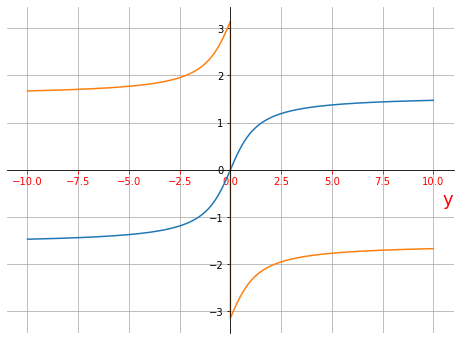

In [20]:
x1 = 1
y = np.linspace(-10, 10, 10001)[1:]

fig, ax = plt.subplots(figsize=(8,6)) 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

ax.set_xlabel("y", loc='right', fontsize=18, color='r')
ax.tick_params(axis='x', colors='red')
ax.grid()

x2 = -1
ax.plot(y/x1, np.arctan2(y, x1), label="atan2(y/x=1)")
ax.plot(y/x2, np.arctan2(y, x2), label="atan2(y/x=-1)")
#ax.legend()


---
# Grid

## Grid with same scale

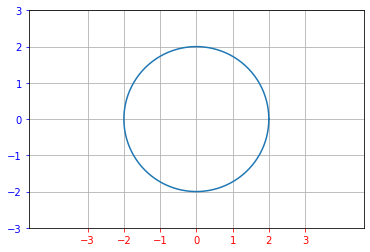

In [37]:
angle = np.linspace(0, 2 * np.pi, 100)

fig, ax = plt.subplots() 

# For the same scaling
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/axis_equal_demo.html
ax.axis('equal')

ax.set_xticks(np.linspace(-3, 3, 7))
ax.set_yticks(np.linspace(-3, 3, 7))
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='blue')
ax.grid()

ax.plot(2 * np.cos(angle), 2 * np.sin(angle))
plt.show()

## Tick

A [Tick class](https://github.com/matplotlib/matplotlib/blob/master/lib/matplotlib/axis.py#L35) is the base class for [XTick](https://github.com/matplotlib/matplotlib/blob/master/lib/matplotlib/axis.py#L412) and [YTick](https://github.com/matplotlib/matplotlib/blob/master/lib/matplotlib/axis.py#L479) classes controls the ticks for the axes respectively. They belong to the [Axis module](https://github.com/matplotlib/matplotlib/blob/master/lib/matplotlib/axis.py).

* [matplotlib.pyplot.xticks](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html)
* [matplotlib.pyplot.ytiks](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yticks.html)

[Tick Locator](https://matplotlib.org/stable/gallery/ticks_and_spines/tick-locators.html) controls the positions of ticks on a scale, and [matplotlib.axes.Axes.tick_params](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html) controls the appearance of ticks, tick labels, and gridlines. There are multiple ticking scales, for instane, [LogLoator](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.LogLocator) show the tick locations for log axes.

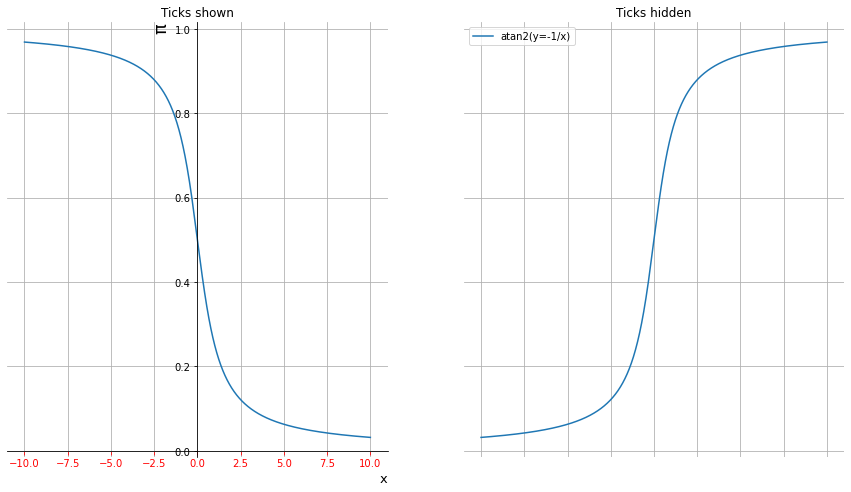

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(15,8)) 

# --------------------------------------------------------------------------------
# axis 0 to show the ticks.
# --------------------------------------------------------------------------------
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_position('zero')
ax[0].spines['left'].set_position('zero')
ax[0].set_xlabel("x", loc='right', fontsize=13)
ax[0].set_ylabel("π", loc="top", fontsize=18)
ax[0].set_title("Ticks shown")

# --------------------------------------------------------------------------------
# Control ticks via axis.tick_params.
# --------------------------------------------------------------------------------
ax[0].tick_params(axis='x', colors='red')
ax[0].grid()

x = np.linspace(-10, 10, 10001)[::-1]
y1 = 1
ax[0].plot(x, np.arctan2(y1, x) / np.pi, label="atan2(y=+1/x)")

# --------------------------------------------------------------------------------
# axis 1 to hide the ticks.
# --------------------------------------------------------------------------------
ax[1].spines['top'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].set_title("Ticks hidden")

# --------------------------------------------------------------------------------
# Control ticks via axis.tick_params.
# --------------------------------------------------------------------------------
ax[1].tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    left=False, 
    right=False,
    labelbottom=False,
    labelleft=False
) 
y2 = -1
ax[1].plot(x, np.arctan2(y2, x) / np.pi, label="atan2(y=-1/x)")
ax[1].grid()
ax[1].legend()
